In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Computers.csv')
dataset.sample(5)

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
2461,2462,3097,66,528,8,15,yes,yes,yes,216,13
293,294,2455,66,250,8,14,no,no,yes,108,4
2770,2771,1795,50,340,4,14,no,no,yes,292,14
5668,5669,2594,100,850,16,15,yes,no,yes,163,27
2363,2364,2390,50,214,4,14,yes,yes,yes,216,13


In [3]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,[-1]].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
X_train.shape

(4694, 2)

In [6]:
y_train.shape

(4694, 1)

In [7]:
X_test.shape

(1565, 2)

In [8]:
y_test.shape

(1565, 1)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\noval\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred


array([12, 18, 21, ...,  8, 17, 27], dtype=int64)

In [12]:
y_actual = y_test.flatten()
y_actual

array([17, 19, 24, ..., 13,  9, 18], dtype=int64)

In [13]:
for i in range(len(y_actual)):
    print(f'Hasil aktual: {y_actual[i]} hasil prediksi: {y_pred[i]}')

Hasil aktual: 17 hasil prediksi: 12
Hasil aktual: 19 hasil prediksi: 18
Hasil aktual: 24 hasil prediksi: 21
Hasil aktual: 7 hasil prediksi: 17
Hasil aktual: 20 hasil prediksi: 17
Hasil aktual: 19 hasil prediksi: 30
Hasil aktual: 15 hasil prediksi: 8
Hasil aktual: 14 hasil prediksi: 17
Hasil aktual: 16 hasil prediksi: 17
Hasil aktual: 8 hasil prediksi: 23
Hasil aktual: 12 hasil prediksi: 12
Hasil aktual: 23 hasil prediksi: 22
Hasil aktual: 6 hasil prediksi: 8
Hasil aktual: 12 hasil prediksi: 12
Hasil aktual: 18 hasil prediksi: 17
Hasil aktual: 15 hasil prediksi: 8
Hasil aktual: 14 hasil prediksi: 17
Hasil aktual: 13 hasil prediksi: 12
Hasil aktual: 16 hasil prediksi: 12
Hasil aktual: 21 hasil prediksi: 20
Hasil aktual: 2 hasil prediksi: 8
Hasil aktual: 16 hasil prediksi: 12
Hasil aktual: 10 hasil prediksi: 12
Hasil aktual: 21 hasil prediksi: 18
Hasil aktual: 4 hasil prediksi: 17
Hasil aktual: 9 hasil prediksi: 17
Hasil aktual: 17 hasil prediksi: 17
Hasil aktual: 18 hasil prediksi: 12
Ha

No handles with labels found to put in legend.


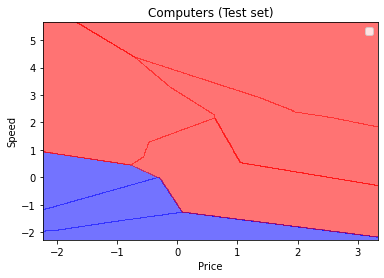

In [15]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.55, cmap = ListedColormap(('blue', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Computers (Test set)')
plt.xlabel('Price')
plt.ylabel('Speed')
plt.legend()
plt.show()